In [13]:
import pandas as pd

### Анализ структуры и предобработка данных (1 балл)

Unnamed: 0  user id test group  converted  total ads most ads day   
0           0  1069124         ad      False        130       Monday  \
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14

Unnamed: 0  user id test group  converted  total ads most ads day   
588096      588096  1278437         ad      False          1      Tuesday  \
588097      588097  1327975         ad      False          1      Tuesday   
588098      588098  1038442         ad      False          3      Tuesday   
588099      588099  1496395         ad      False          1      Tuesday   
588100      588100  1237779         ad      False          1      Tuesday   

        most ads hour  
588096             23  
588097             23  
588098             23  
588099             23  
588100             23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


None

Unnamed: 0       user id      total ads  most ads hour
count  588101.000000  5.881010e+05  588101.000000  588101.000000
mean   294050.000000  1.310692e+06      24.820876      14.469061
std    169770.279668  2.022260e+05      43.715181       4.834634
min         0.000000  9.000000e+05       1.000000       0.000000
25%    147025.000000  1.143190e+06       4.000000      11.000000
50%    294050.000000  1.313725e+06      13.000000      14.000000
75%    441075.000000  1.484088e+06      27.000000      18.000000
max    588100.000000  1.654483e+06    2065.000000      23.000000

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

converted
False    0.974761
True     0.025239
Name: proportion, dtype: float64

test group
ad     0.96
psa    0.04
Name: proportion, dtype: float64

most ads day
Friday       0.157470
Monday       0.148058
Sunday       0.145198
Thursday     0.141102
Saturday     0.138854
Wednesday    0.137575
Tuesday      0.131744
Name: proportion, dtype: float64

<Axes: >

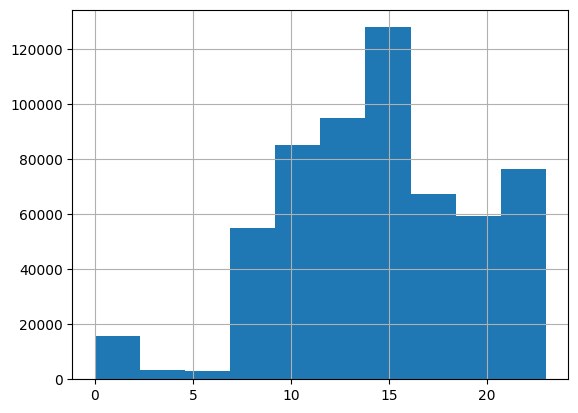

In [14]:
df = pd.read_csv('data/marketing_AB.csv')
display(df.head())
display(df.tail())
display(df.info())
display(df.describe())
display(df.nunique())
display(df['converted'].value_counts(normalize=True))
display(df['test group'].value_counts(normalize=True))
display(df['most ads day'].value_counts(normalize=True))
df['most ads hour'].hist()

In [15]:
display(df[df['test group'] == 'psa'].head())

Unnamed: 0  user id test group  converted  total ads most ads day   
18           18   900681        psa      False        248     Saturday  \
38           38   905704        psa      False         27     Thursday   
68           68   904595        psa      False         13      Tuesday   
140         140   901904        psa      False         32    Wednesday   
157         157   902234        psa      False        105      Tuesday   

     most ads hour  
18              19  
38               8  
68              19  
140             19  
157             19

Проверьте данные на наличие пропусков и избавьтесь от них, если нужно. - <b>нет пропусков </b>
Проверьте, есть ли пользователи, которые в процессе A/Bтеста попали в обе группы. Если да, исключите пользователей, оказавшихся в обеих группах.  - <b>нет таких пользователей </b>

<b>Приводить тип данных нет необходимости</b>

### Первичный анализ результатов A/B-теста (1 балл)

In [118]:
df_groups = df.groupby(by='test group').agg({
    'user id' : 'count',
    'converted' : 'sum',
    'total ads' : 'mean',
    'most ads day' : lambda x: x.mode()[0],
    'most ads hour' : lambda x: x.mode()[0]
}).reset_index().rename(columns={'user id':'user_count'}).set_index(keys='test group')

df_groups['conversion'] = df_groups['converted'] / df_groups['user_count']
df_groups

user_count  converted  total ads most ads day  most ads hour   
test group                                                                 
ad              564577      14423  24.823365       Friday             13  \
psa              23524        420  24.761138     Thursday             13   

            conversion  
test group              
ad            0.025547  
psa           0.017854

Конверсия в группе с рекламой выше, при этом среднее кол-во рекламы одинаково. Поскольку нет дат, то нельзя сделать вывод о том, нет ли эффекта подглядывания или он есть.

Обе группы смотрят максимальное кол-во рекламы в 13:00, но отличается день наибольшего просмотра.

### Статистические тесты для анализа результатов A/B-теста (2 балла)

Нулевая гипотеза - конверсия в обоих группах одинаковая. Альтернативная - конверсия отличается.

In [27]:
#поскольку конверсия - отношение то мы воспользуемся z-тестом для пропорций
from statsmodels.stats.proportion import proportions_ztest

In [89]:
df_pivot = df_groups[['user_count', 'converted']]

In [91]:
display(df_pivot['converted'])

a = (df_pivot['converted'] / df_pivot['user_count'])

pa = a[0]
pb = a[1]
na = df_pivot['user_count'][0]
nb = df_pivot['user_count'][1]

p = (pa*na + pb*nb)/(na+nb)

pa, pb, na, nb, p
print(f'pa = {pa}, pb = {pb}, p = {p}, na = {na}, nb = {nb}')

test group
ad     14423
psa      420
Name: converted, dtype: int64

pa = 0.025546559636683747, pb = 0.01785410644448223, p = 0.02523886203220195, na = 564577, nb = 23524


In [26]:
SE = (p*(1-p)*(1/na + 1/nb)) ** 0.5
z = (pa-pb) / SE

print(f'SE = {SE}, z = {z}')

SE = 0.0010437410649006525, z = 7.3700781265454145


In [92]:
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
z_stat, p_value = proportions_ztest(
    count=df_pivot['converted'], #число «успехов»
    nobs=df_pivot['user_count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 3))
# сравниваем полученное p-value с уровнем значимости
if (p_value <= alpha):
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

print(f'z={z_stat}')
# p-value:  0.19
# У нас нет оснований отвергнуть нулевую гипотезу

p-value:  0.0
Отвергаем нулевую гипотезу в пользу альтернативной
z=7.3700781265454145


Проверим есть ли разница между кол-вом увиденной рекламы (хотя визуально видно, что нет)

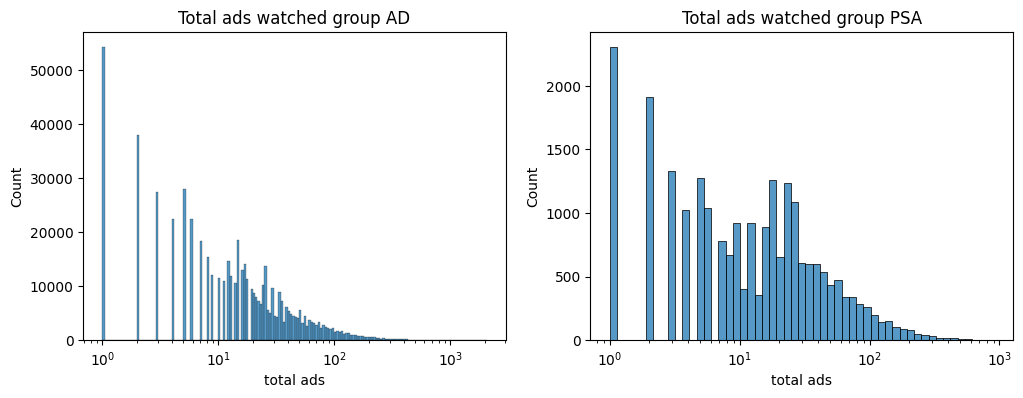

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='total ads', data=df[df['test group'] == 'ad'], ax=axes[0],log_scale=True,nor)
sns.histplot(x='total ads', data=df[df['test group'] == 'psa'], ax=axes[1],log_scale=True)
# задаём названия графикам
axes[0].set_title('Total ads watched group AD');
axes[1].set_title('Total ads watched group PSA');

Изобразим на одном графике, а также построим накопленнуб вероятность

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# создаём два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='total ads', data=df,hue='test group', log_scale=True,stat='density',common_norm=False, ax=axes[0])
sns.ecdfplot(x='total ads', data=df,hue='test group',log_scale=True, ax=axes[1])
# задаём названия графикам
axes[0].set_title('Total ads watched density log-scale');
axes[1].set_title('Total ads watched cumulative log-scale');

Распределение кол-ва просмотренной рекламы в обоих группах визуально не нормальное. Количество просмотренной рекламы выглядит схожим, при этом в группе ad немного меньше пользователей которым показывали рекламу в объеме ~ 10, но несколько больше на хвосте распределения в районе ~100. Надо сказать что разница достаточно слабая и заметна только в логарифмическом масштабе.


Удостоверимся в не нормальности распределения total ads с помощью теста Шапиро.

In [66]:
from scipy.stats import shapiro
total_ads_ad = df[df['test group'] == 'ad']['total ads']
total_ads_psa = df[df['test group'] == 'psa']['total ads']

In [61]:
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро — Уилка для выборок
shapiro_result_a = shapiro(total_ads_ad)
shapiro_result_b = shapiro(total_ads_psa)
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))

# сравниваем полученное p-value для группы А с уровнем значимости
if shapiro_result_a.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе А является нормальным")

# сравниваем полученное p-value для группы B с уровнем значимости
if shapiro_result_b.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального")
else:
    print("Принимаем нулевую гипотезу. Распределение в группе B является нормальным")

# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределение в группе А является нормальным
# Принимаем нулевую гипотезу. Распределение в группе B является нормальным

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе А отлично от нормального
Отвергаем нулевую гипотезу в пользу альтернативной. Распределение в группе B отлично от нормального


c:\Users\kosty\anaconda3\envs\conda_3_9_11\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [43]:
from scipy.stats import mannwhitneyu

In [115]:
percentiles_ad = total_ads_ad.quantile([0.10, 0.25, 0.50, 0.75, 0.90,0.95,0.98,0.995,0.999,0.9999,0.99999])
percentiles_psa = total_ads_psa.quantile([0.10, 0.25, 0.50, 0.75, 0.90,0.95,0.98,0.995,0.999,0.9999,0.99999])
percentiles_ad.name = 'percentiles_ad'
percentiles_psa.name = 'percentiles_psa'
df_procentiles =  pd.concat([percentiles_ad, percentiles_psa], axis=1)
df_procentiles['diff, %'] = (df_procentiles['percentiles_ad'] / df_procentiles['percentiles_psa'] -1 ) * 100
df_procentiles

percentiles_ad  percentiles_psa    diff, %
0.10000         2.00000          2.00000   0.000000
0.25000         4.00000          4.00000   0.000000
0.50000        13.00000         12.00000   8.333333
0.75000        27.00000         26.00000   3.846154
0.90000        56.00000         59.00000  -5.084746
0.95000        87.00000         92.85000  -6.300485
0.98000       143.00000        152.00000  -5.921053
0.99500       276.00000        274.38500   0.588589
0.99900       501.00000        459.20100   9.102550
0.99990       907.54240        748.37410  21.268547
0.99999      1403.66784        883.94746  58.795393

In [82]:
total_ads_ad.max(), total_ads_psa.max()

(2065, 907)

In [83]:
total_ads_ad.mean(), total_ads_psa.mean()

(24.823365103431417, 24.761137561639178)

Воспользуемся тестом Манна — Уитни для выборок суммарного количества просмтренной рекламы для пользователей

In [70]:
alpha = 0.05 # уровень значимости

# вычисляем результат теста Манна — Уитни для выборок
results = mannwhitneyu(
    x=total_ads_ad,
    y=total_ads_psa,
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 100))

# сравниваем полученное p-value с уровнем значимости
if results.pvalue <= alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной")
else:
    print("У нас нет оснований отвергнуть нулевую гипотезу")

p-value: 4.6909108547205694e-11
Отвергаем нулевую гипотезу в пользу альтернативной


Тест Манна — Уитни показал статистическую значимость отличия между двумя выборками. При этом распределения визуаьлно похожи и их процентили отличаются не существенно. Скорее всего это вызвано более сильным скосом распределения вправо в выборке которой показывали рекламу. Использовать результаты этого теста для решения бизнес задач не рекомендуется.

### Доверительные интервалы для анализа результатов A/B-теста (1 балл)

In [93]:
df_pivot

user_count  converted
test group                       
ad              564577      14423
psa              23524        420

In [96]:
df_pivot.loc['ad','user_count']

564577

In [97]:
from statsmodels.stats import proportion

Вычислим доверительный интервалы для конверсий в группе Ad и Psa

In [99]:
# вычисляем доверительный интервал для конверсии в группе Ad с уровнем доверия 0.95
lower_bound_ad, upper_bound_ad = proportion.proportion_confint(
    count=df_pivot.loc['ad','converted'],
    nobs=df_pivot.loc['ad','user_count'],
    alpha=0.05
)

# вычисляем доверительный интервал для конверсии в группе psa с уровнем доверия 0.95
lower_bound_psa, upper_bound_psa = proportion.proportion_confint(
    count=df_pivot.loc['psa','converted'],
    nobs=df_pivot.loc['psa','user_count'],
    alpha=0.05
)

print('Доверительный интервал для конверсии в группе Ad: {}'.format((round(lower_bound_ad * 100, 2), round(upper_bound_ad * 100, 2))))
print('Доверительный интервал для конверсии в группе Psa: {}'.format((round(lower_bound_psa * 100, 2), round(upper_bound_psa * 100, 2))))

Доверительный интервал для конверсии в группе Ad: (2.51, 2.6)
Доверительный интервал для конверсии в группе Psa: (1.62, 1.95)


Доверительные интервалы не пересекаются, а значит есть статистическая разница между выборками. Показ рекламы повышает конверсию.

Вычислим доверительный интервалы для разницы конверсий в группе Ad и Psa

In [100]:
from scipy.stats import norm

In [113]:
# переворачиваем знак относительно того, что было на семинаре
def diff_proportion_conf_interval(x_p, n, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = - x_p[1] + x_p[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z-критическое
    eps = z_crit * (x_p[0] * (1 - x_p[0])/n[0] + x_p[1] * (1 - x_p[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из  границ интервала
    return lower_bound, upper_bound

In [107]:
df_pivot.loc[:,'user_count'].to_list()

[564577, 23524]

In [108]:
df_pivot['conversion'] = df_pivot['converted'] / df_pivot['user_count']

C:\Users\kosty\AppData\Local\Temp\ipykernel_4684\3635410635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pivot['conversion'] = df_pivot['converted'] / df_pivot['user_count']


In [109]:
df_pivot

user_count  converted  conversion
test group                                   
ad              564577      14423    0.025547
psa              23524        420    0.017854

In [114]:
# размеры выборок групп А и B
n = df_pivot.loc[:,'user_count'].to_list()
# выборочная пропорция групп A и B
x_p = df_pivot.loc[:,'conversion'].to_list()

# строим доверительный интервал для разности пропорций
lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n)


# выводим результат
print('Доверительный интервал для разности конверсий: {}'.format((round(lower_bound*100, 2), round(upper_bound*100, 2))))

Доверительный интервал для разности конверсий: (0.6, 0.94)


Как и ожидалось доверительный интервал строго положительный, т.е. есть статистическое отличие между выборками. А именно группа которой показывали рекламу показала значительно более высокую конверсию по сравнению с той, которой рекламу не показывали.

In [173]:
plt.figure(figsize=(5, 8))
barplot = sns.barplot(x='test group', y='converted', data=df, errorbar=('ci',95))
ci_bounds = {'ad':(lower_bound_ad,upper_bound_ad), 'psa': (lower_bound_psa,upper_bound_psa)}  # Словарь для хранения границ CI

# Добавляем аннотации к столбцам
for i, p in enumerate(barplot.patches):
    group_name = df['test group'].unique()[i]
    lower, upper = ci_bounds[group_name]
    plt.text(p.get_x() + p.get_width() / 2., lower, f'{lower:.5f}', 
             ha='center', va='bottom', color='black', fontsize=10)
    plt.text(p.get_x() + p.get_width() / 2., upper, f'{upper:.5f}', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.title('Конверсия по группам с ДИ@95')
plt.show()


### Соответствие выводов бизнес-вопросам (1 балл)